1. Importar librerías

In [1]:
# PEP8 es una guía de estilo para escribir código Python. (https://www.python.org/dev/peps/pep-0008/)

# Librerías estándar de python
import os
import tarfile
import urllib.request as request
import pandas as pd
# Librerías de terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Librerías locales
# from mi_clase import AwsStorage

%matplotlib inline

In [2]:
import sys
print(sys.executable)


d:\OneDrive - Landers\Documentos\Curso Python\parte_2\Sln_PublicarModelodeRegresion\venv\Scripts\python.exe


In [3]:
import os

# Carpeta donde están los datos
DATA_DIR = os.path.join("data")

# Ruta completa al archivo
INGRESOS_PATH = os.path.join(DATA_DIR, "ingresos.txt")


In [4]:
print(INGRESOS_PATH)

data\ingresos.txt


3. Extracción de los datos

In [5]:
import os

# Ruta a la carpeta de datos
DATA_DIR = os.path.join("data")
# Ruta completa al archivo
INGRESOS_PATH = os.path.join(DATA_DIR, "ingresos.txt")

def cargar_datos(path: str = INGRESOS_PATH) -> pd.DataFrame:
    # Verifica que el archivo exista
    if not os.path.isfile(path):
        raise FileNotFoundError(f"Archivo no encontrado en: {path}")
    
    # Carga el archivo CSV y lo devuelve como DataFrame
    return pd.read_csv(path)

In [13]:
print(DATA_DIR)

data


In [15]:
print("Directorio actual:", os.getcwd())

Directorio actual: d:\OneDrive - Landers\Documentos\Curso Python\parte_2\Sln_PublicarModelodeRegresion\notebooks


In [16]:
os.chdir( 'd:\OneDrive - Landers\Documentos\Curso Python\parte_2\Sln_PublicarModelodeRegresion')

In [21]:
# Llamamos a la función para descargar los datos
data=cargar_datos()

In [22]:
print(data.head())

   edad nivel_educativo  horas_trabajadas  ingreso_mensual
0    56      secundaria              48.9          1673.99
1    46      secundaria              46.1          1614.62
2    32      secundaria              32.8          1398.33
3    60     universidad              37.3          2305.59
4    25     universidad              38.6          2037.76


4. Exploración de datos

4.1 Tipos de datos

In [23]:
# Resumen del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              100 non-null    int64  
 1   nivel_educativo   100 non-null    object 
 2   horas_trabajadas  100 non-null    float64
 3   ingreso_mensual   100 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [25]:
# Para el caso de la variable `nivel_educativo`, que es de tipo objeto (string), podemos utilizar el método `value_counts()`
# para ver la cantidad de ocurrencias de cada categoría.
data["nivel_educativo"].value_counts()

nivel_educativo
secundaria     43
universidad    41
posgrado       16
Name: count, dtype: int64

Se observa que las categorías 'secundaria' y 'universidad' están equilibradas porque tienen aproximadamente la misma cantidad de observaciones, la categoría 'posgrado' presenta un desequilibrio, dado que lo que se busca es predecir el 'ingreso' la cual es una variable numérica, usando ElasticNET (Regresión), no va a ser necerario balancearla.

4.2 Estadísticas Descriptivas

In [26]:
# El método `describe()` nos proporciona estadísticas descriptivas de las columnas numéricas del DataFrame.
data.describe()

,edad,horas_trabajadas,ingreso_mensual
count,100.00000,100.000000,100.000000
mean,40.88000,39.618000,2050.027300
std,13.99082,9.575436,703.799056
min,18.00000,20.000000,997.200000
25%,30.50000,33.025000,1437.977500
50%,41.00000,39.750000,1982.415000
75%,53.25000,46.225000,2474.257500
max,64.00000,60.000000,3726.640000


4.3 Histograma de las variables numéricas


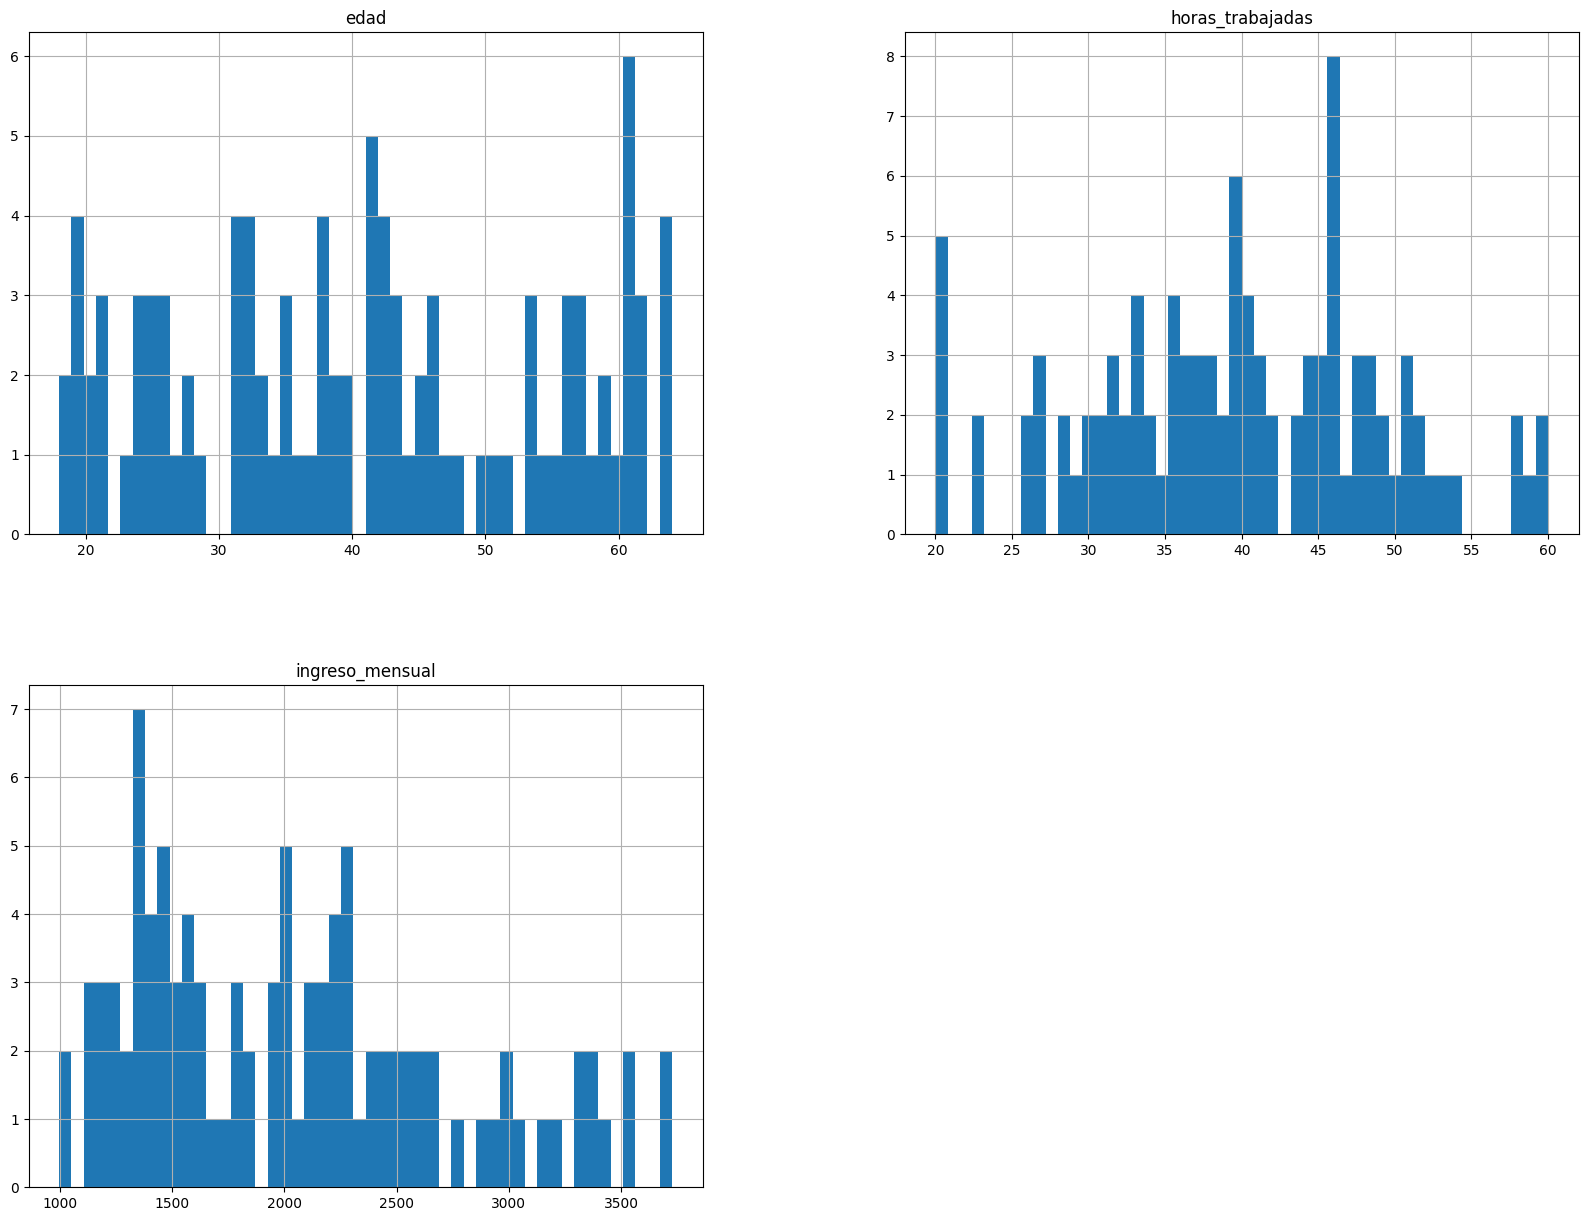

In [27]:
# El método `hist()` nos permite visualizar la distribución de los datos numéricos en el DataFrame.
data.hist(bins=50, figsize=(20, 15))
plt.show()

edad: Distribución dispersa, con varios picos entre 20 y 60 años. Indica que hay participantes en varios rangos de edad, sin un solo grupo dominante.

horas_trabajadas: Más concentrado entre 20 y 40 horas, sugiere que la mayoría trabaja tiempo parcial o completo estándar.

ingreso_mensual: Parece tener valores atípicos o datos agrupados; la mayor parte de los datos están muy concentrados en un solo rango.

4.4 Análisis de correlación

In [31]:
#Extraer correlaciones (no se deben incluir variables numéricas)
corr_matrix = data.loc[:, data.columns != "nivel_educativo"].corr()

In [32]:
#Extraer las correlación de todas las variables con 'ingreso_mensual'
corr_matrix["ingreso_mensual"].sort_values(ascending=False)

ingreso_mensual     1.000000
edad                0.382436
horas_trabajadas    0.214370
Name: ingreso_mensual, dtype: float64

Se observa que las variables 'edad' y 'horas_trabajadas' tienen correlación débil con la variable respuesta 'ingreso_mensual', esto es explican poco por sí solas. Para el modelo ElasticNET se esperan coeficientes bajos o inclusive cero. Se usan como base pero se debería buscar o construir otras variables para explicar mejor el modelo.

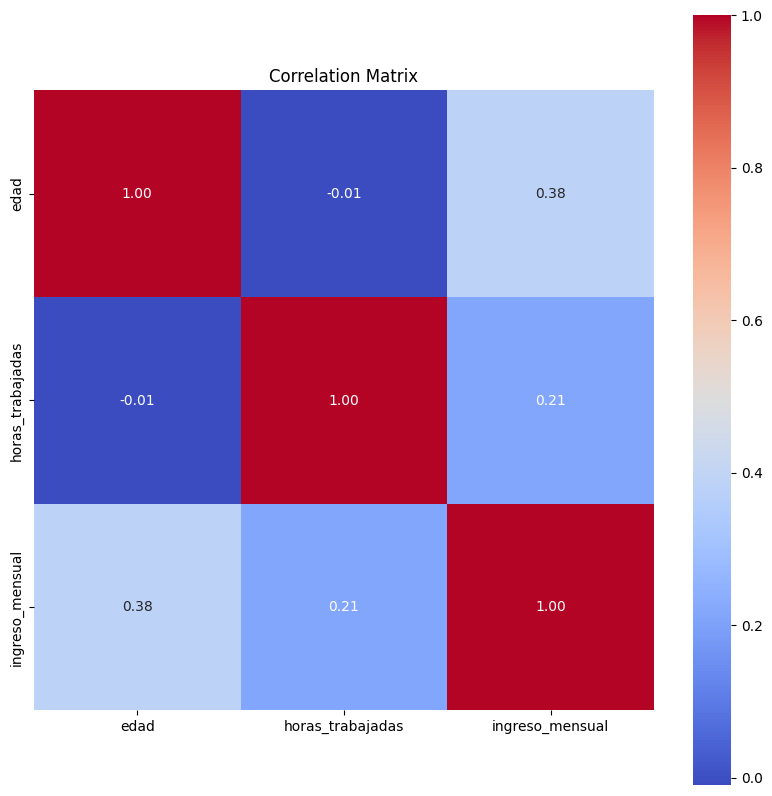

In [33]:
#Grafico de correlación:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

Se observa que las variables 'horas_trabajadas' y 'edad' presentan una correlación prácticamente nula, es decir estás variables no están relacionadas.

'Edad' e 'ingreso_mensual' tienen una correlación de 0.38 lo cuál es una correlación débil/moderada positiva.

'horas_trabajadas' e 'ingreso_mensual' presentan una correlación de 0.21 lo cuál es débil positiva.
 Luego como las correlaciones son bajas, puede ocurrir que el modelo ElasticNET anule coeficientes, y se deban buscar más variables.


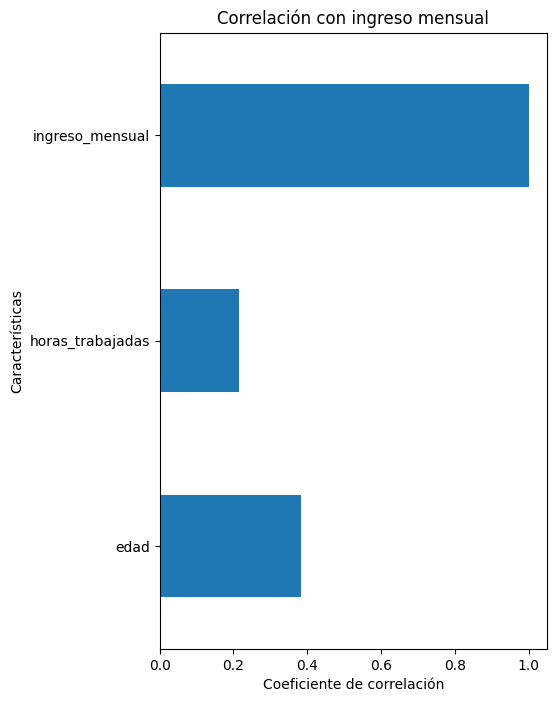

In [36]:
corr_matrix["ingreso_mensual"].plot(kind="barh", figsize=(5, 8))
plt.title("Correlación con ingreso mensual")
plt.ylabel("Características")
plt.xlabel("Coeficiente de correlación")
plt.show()

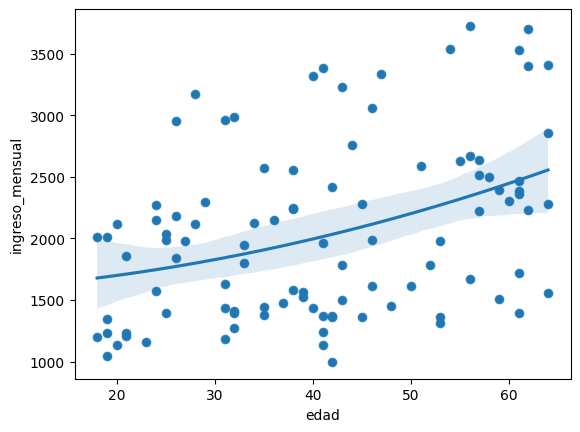

In [39]:
sns.scatterplot(x='edad', y='ingreso_mensual', data=data)
sns.regplot(x='edad', y='ingreso_mensual', data=data, order=2)  # Ajuste cuadrático
plt.show()

Se observa una curvatura

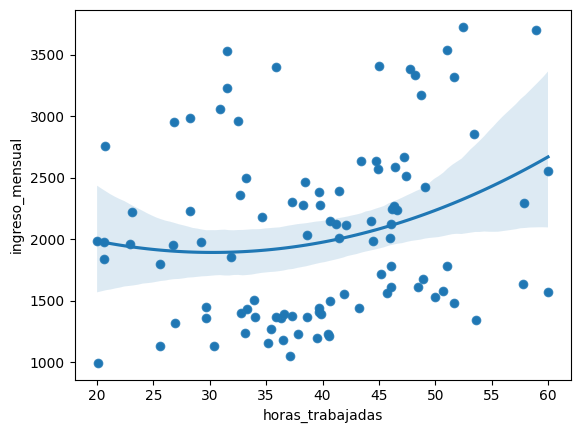

In [40]:
sns.scatterplot(x='horas_trabajadas', y='ingreso_mensual', data=data)
sns.regplot(x='horas_trabajadas', y='ingreso_mensual', data=data, order=2)  # Ajuste cuadrático
plt.show()

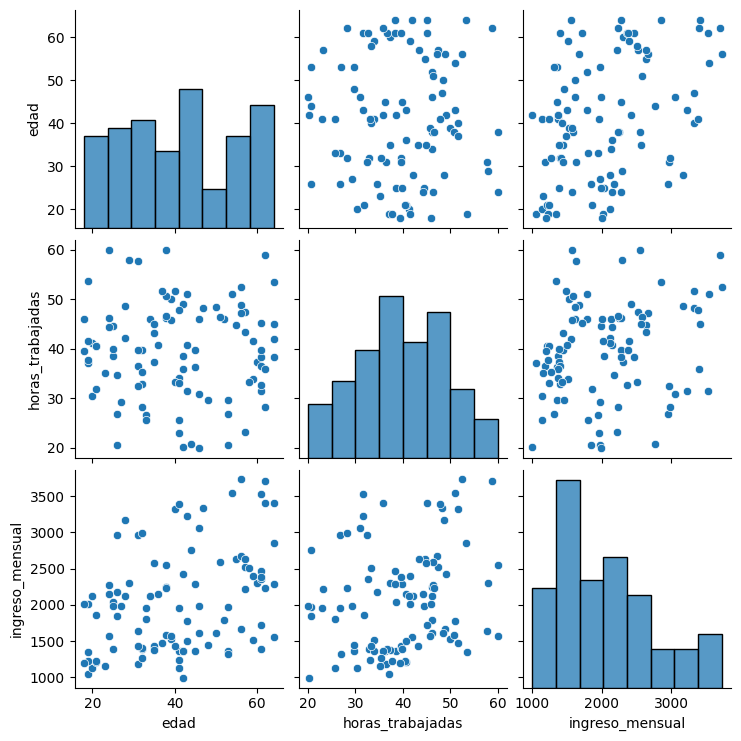

In [41]:
# Graficar para ver curvatura o combinación
sns.pairplot(data, vars=['edad', 'horas_trabajadas', 'ingreso_mensual'])

4.5 Revisar valores nulos

In [ ]:
#imprimir valores nulos por cada variable
print(data.isna().sum())

edad                0
nivel_educativo     0
horas_trabajadas    0
ingreso_mensual     0
dtype: int64


Se observa que la base de datos no tiene valores faltantes, luego no es necesario realizar imputación sobre los datos

4.5 Ingeniería de características

1. Edad e ingreso mensual (0.38) Dado que la correlación entre edad e ingreso es moderada positiva, y observando el gráfico de puntos, a mayor edad tiende a subir el ingreso pero esta no es totalmente lineal, existe una leve curvatura, luego es decir puede ocurrir que los ingresos suban hasta cierta edad y luego se estabilizan o bajan, esto es se podría considerar edad^2 con la cual se podría capturar.

2. Horas trabajadas e ingreso mensual (0.21) tienen una correlación lineal débil, esto es a más horas aporta algo al ingreso pero no explica mucho por si sola, es decir puede ser una relación no lineal o depender de la edad, es de cir una persona joven trabajando muchas horas es diferente del ingreso de una persona mayor, luego se podría considerar una nueva variable edad * horas_trabajadas.

3. Edad y horas trabajadas (-0.01) no están correlacionadas, luego su interacción puede agregar información útil.

Luego la ingeniería de características a aplicar en este caso sería:

1. Escalar las variables explicativas numéricas, las cuales son 'edad' y 'horas_trabajadas'

2. Realizar un One-Hot para la variable categórica 'nivel_educativo' (drop='first')

3. agregar:

   3.1  edad^2
   3.2 horas_trabajadas^2
   Para capturar posibles curvaturas y efectos.

4. Usar ElasticNet ....seguir aquí